In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score


In [7]:
df = pd.read_csv('data/framingham.csv') #https://www.kaggle.com/kishorekumard/heart-disease-prediction-kishore-kumar

In [13]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [9]:
df['BPMeds'] = df['BPMeds'].fillna(df['BPMeds'].median())
df['totChol'] = df['totChol'].fillna(df['totChol'].median())
df['BMI'] = df['BMI'].fillna(df['BMI'].median())
df['heartRate'] = df['heartRate'].fillna(df['heartRate'].median())
df['glucose'] = df['glucose'].fillna(df['glucose'].median())
df1=df.dropna()


In [11]:
X = df1.iloc[:,0:-2].values
y = df1.iloc[:,-1].values

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

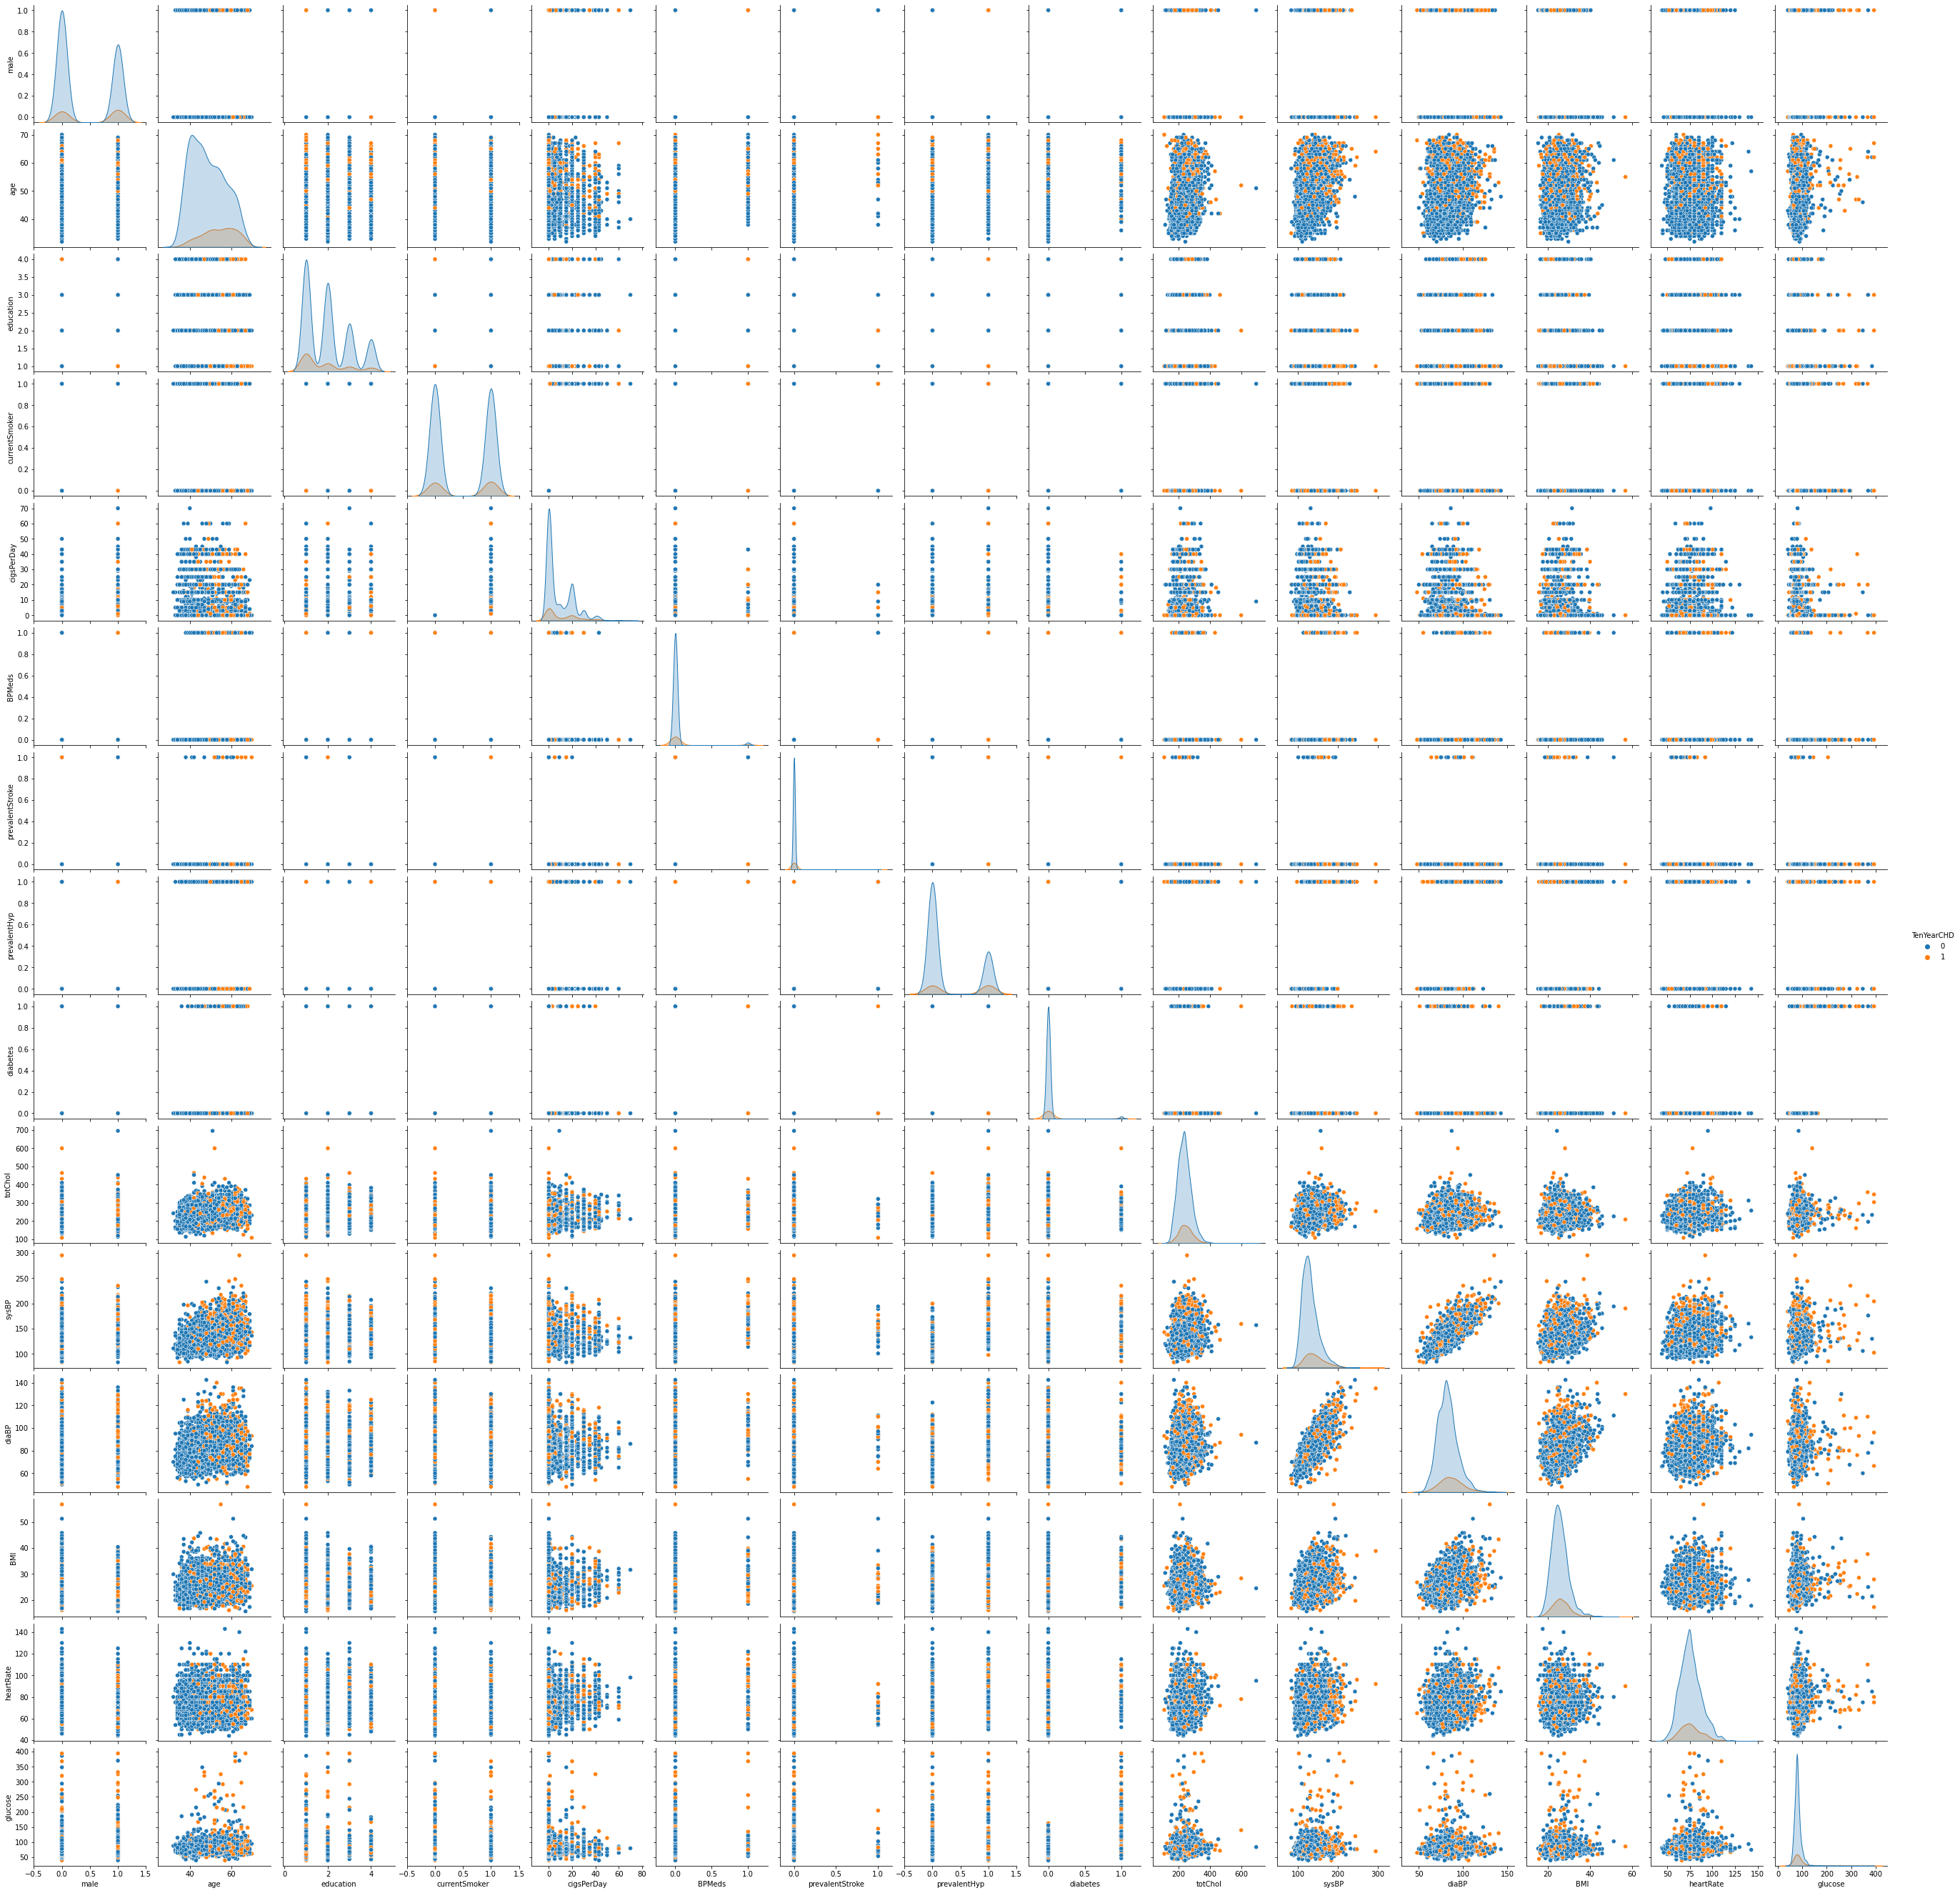

In [14]:
sns.pairplot(df, hue='TenYearCHD', height=2.5)

In [ ]:
class LogisticRegression() :
      
    def __init__( self, learning_rate, iterations):          
        self.learning_rate = learning_rate        
        self.iterations = iterations        

          
    # Function for model training            
    def fit( self, X, Y) :
          
        # no_of_training_examples, no_of_features        
        self.m, self.n = X.shape
          
        # weight initialization        
        self.W = np.zeros( self.n )
          
        self.b = 0        
        self.X = X        
        self.Y = Y
          
        # gradient descent learning
                  
        for i in range(self.iterations) :            
            self.update_weights()
        return self
      
    # Helper function to update weights in gradient descent
    def update_weights(self):


        #Prediction
        y_pred = self.predict( self.X )
        y_predsig = self.sigmoid_activation(np.dot(w,X.T)+b)
        Y_T = Y.T
        cost = (-1/m)*(np.sum((Y_T*np.log(final_result)) + ((1-Y_T)*(np.log(1-final_result)))))
        #

        #Gradient calculation
        dw = (1/self.m)*(X.dot(final_result-Y.T))
        db = (1/self.m)*(np.sum(final_result-Y.T))

        grads = {"dw": dw, "db": db}

        return grads, cost
    
    
    def sigmoid_activation(self, result):        
        final_result = 1/(1+np.exp(-result))
        return final_result
    
    def update_weights( self ) :           
        Y_pred = self.predict( self.X )
          
        # calculate gradients      
        dW = ( - ( 2 * ( self.X.T ).dot( self.Y - Y_pred ) ) +               
               ( 2 * self.l2_penality * self.W ) ) / self.m     
        db = - 2 * np.sum( self.Y - Y_pred ) / self.m 
          
        # update weights    
        self.W = self.W - self.learning_rate * dW    
        self.b = self.b - self.learning_rate * db        
        return self
      
    # Hypothetical function  h( x ) 
    def predict(self, X) :    
        return X.dot( self.W ) + self.b

In [29]:
def weightInitialization(n_features):
    w = np.zeros((1,n_features))#np.random.rand(1,n_features)
    b = 0 #np.random.rand(1)
    return w,b

In [30]:
def sigmoid_activation(result):
    final_result = 1/(1+np.exp(-result))
    return final_result

In [31]:
def model_optimize(w, b, X, Y):
    m = X.shape[0]
    
    #Prediction
    final_result = sigmoid_activation(np.dot(w,X.T)+b)
    Y_T = Y.T
    cost = (-1/m)*(np.sum((Y_T*np.log(final_result)) + ((1-Y_T)*(np.log(1-final_result)))))
    #
    
    #Gradient calculation
    dw = (1/m)*(np.dot(X.T, (final_result-Y.T).T))
    db = (1/m)*(np.sum(final_result-Y.T))
    
    grads = {"dw": dw, "db": db}
    
    return grads, cost

In [32]:
def model_predict(w, b, X, Y, learning_rate, no_iterations):
    costs = []
    for i in range(no_iterations):
        #
        grads, cost = model_optimize(w,b,X,Y)
        #
        dw = grads["dw"]
        db = grads["db"]
        #weight update
        w = w - (learning_rate * (dw.T))
        b = b - (learning_rate * db)
        #
        
        if (i % 100 == 0):
            costs.append(cost)
            #print("Cost after %i iteration is %f" %(i, cost))
    
    #final parameters
    coeff = {"w": w, "b": b}
    gradient = {"dw": dw, "db": db}
    
    return coeff, gradient, costs

In [33]:
def predict(final_pred, m):
    y_pred = np.zeros((1,m))
    for i in range(final_pred.shape[1]):
        if final_pred[0][i] > 0.5:
            y_pred[0][i] = 1
    return y_pred

In [38]:
#Get number of features
n_features = X_train.shape[1]
print('Number of Features', n_features)
w, b = weightInitialization(n_features)

#Gradient Descent
coeff, gradient, costs = model_predict(w, b, X_train, y_train, learning_rate=0.0001,no_iterations=4500)

#Final prediction
w = coeff["w"]
b = coeff["b"]
print('Optimized weights', w)
print('Optimized intercept',b)
#
final_train_pred = sigmoid_activation(np.dot(w,X_train.T)+b)

final_test_pred = sigmoid_activation(np.dot(w,X_test.T)+b)
#
m_tr =  X_train.shape[0]
m_ts =  X_test.shape[0]
#
y_train_pred = predict(final_train_pred, m_tr)
print('Training Accuracy',accuracy_score(y_train_pred.T, y_train))
#
y_test_pred = predict(final_test_pred, m_ts)
print('Test Accuracy',accuracy_score(y_test_pred.T, y_test))

Number of Features 14
Optimized weights [[ 0.00384515  0.03028197 -0.01213225 -0.00240539  0.01611246  0.00191729
   0.00083125  0.00796953  0.00222414 -0.00515985  0.02488421 -0.02808845
  -0.03307813 -0.03057466]]
Optimized intercept -0.0034784812958375154
Training Accuracy 0.8507306889352818
Test Accuracy 0.8449675324675324


<AxesSubplot:>

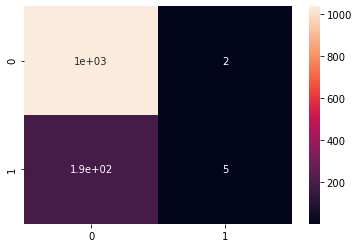

In [39]:
from sklearn.metrics import confusion_matrix
cn = confusion_matrix( y_test, y_test_pred.T)
sns.heatmap(cn,annot=True)

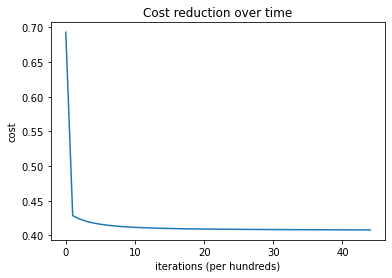

In [40]:
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title('Cost reduction over time')
plt.show()

In [41]:
from sklearn.linear_model import LogisticRegression


clf = LogisticRegression(max_iter =4500 )

clf.fit(X_tr_arr, y_tr_arr)

print (clf.intercept_, clf.coef_)

pred = clf.predict(X_ts_arr)
print(accuracy_score(pred.T, y_ts_arr))

[-7.27194169] [[ 4.75235323e-01  6.40629634e-02  5.00036519e-03 -1.50070229e-01
   2.58105820e-02  4.14552994e-01  1.03438439e+00  9.04869342e-02
   8.22674680e-01  5.01040085e-04  1.69835629e-02 -4.65077027e-03
  -2.15957211e-03 -3.32110162e-03]]
0.8433441558441559
